### OUR GOAL

Given historical data on patient details with information on whether the patient has osteopenia, osteoporosis, or normal bone density, can we build a model that can predict the diagnosis based on a new patient's data?

It's crucial to consider classification metrics when evaluating the performance of our model, as accurate predictions can significantly impact patient care and treatment planning.

The "Diagnosis" column contains our label.


#### DATASET DESCRIPTION  


| Column Name                   | Description                                                                                           |
|-------------------------------|-------------------------------------------------------------------------------------------------------|
| `Joint Pain:`                 | Whether the patient experiences joint pain (e.g., 'yes' or 'no').                                     |
| `Gender`                      | The gender of the patient (e.g., 'male' or 'female').                                                 |
| `Age`                         | The age of the patient in years.                                                                      |
| `Menopause Age`               | The age at which the patient reached menopause, which is the end of menstrual cycles in women.        |
| `height (meter)`              | The height of the patient in meters.                                                                  |
| `Weight (KG)`                 | The weight of the patient in kilograms.                                                               |
| `Smoker`                      | Whether the patient smokes tobacco (e.g., 'yes' or 'no').                                             |
| `Alcoholic`                   | Whether the patient consumes alcohol (e.g., 'yes' or 'no').                                           |
| `Diabetic`                    | Whether the patient has diabetes, a chronic condition that affects blood sugar regulation (e.g., 'yes' or 'no').           |
| `Hypothyroidism`              | Whether the patient has hypothyroidism, a condition where the thyroid gland is underactive (e.g., 'yes' or 'no').            |
| `Seizer Disorder`             | Whether the patient has a seizure disorder, such as epilepsy, which involves abnormal electrical activity in the brain (e.g., 'yes' or 'no'). |
| `Estrogen Use`                | Whether the patient uses estrogen, a hormone treatment often used for menopausal symptoms (e.g., 'yes' or 'no').          |
| `Occupation`                  | The type of occupation the patient has (e.g., 'active', 'sedentary').                                 |
| `History of Fracture`         | Whether the patient has a history of bone fractures (e.g., 'yes' or 'no').                            |
| `Dialysis:`                   | Whether the patient is undergoing dialysis treatment, which is used to filter the blood when the kidneys are not functioning properly (e.g., 'yes' or 'no').                           |
| `Family History of Osteoporosis` | Whether the patient has a family history of osteoporosis, a condition where bones become weak and brittle (e.g., 'yes' or 'no').                     |
| `Maximum Walking distance (km)` | The maximum distance the patient can walk, measured in kilometers.                                   |
| `Daily Eating habits`         | The patient's daily eating habits (e.g., 'balanced', 'unbalanced').                                   |
| `Medical History`             | The patient's medical history, including any known conditions.                                        |
| `T-score Value`               | A score indicating the patient's bone density, used to diagnose osteoporosis.                         |
| `BMI:`                        | The patient's Body Mass Index, a measure of body fat based on height and weight.                      |
| `Obesity`                     | The patient's obesity status (e.g., 'normal', 'overweight', 'underweight').                           |
| `Diagnosis`                   | The medical diagnosis of the patient (e.g., 'osteopenia', 'normal', 'osteoporosis').                  |


#### Loading the Data and Other Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
# Load the original dataset
df = pd.read_csv("patient details.csv")

### EXPLORATORY DATA ANALYSIS AND PREPROCESSING

In [4]:
df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,Diabetic,Hypothyroidism,Number of Pregnancies,Seizer Disorder,Estrogen Use,Occupation,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,NaN,1.64592,65,yes,no,no,no,NaN,no,no,shopkeeper,no,no,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,no,no,3.0,no,no,h.wife,no,no,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,no,yes,3.0,no,no,h.wife,l.leg,no,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,no,yes,3.0,no,no,teacher,no,no,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5,OP5,yes,female,40,NaN,1.49352,54,no,no,no,no,3.0,no,no,h.wife,no,no,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,yes,female,56,NaN,1.54000,80,no,no,no,yes,5.0,yes,yes,teacher,no,no,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,osteopenia
236,237,OS49,yes,male,55,NaN,1.53000,63,no,no,no,no,NaN,no,no,G.E,no,no,no,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,osteoporosis
237,238,OP153,yes,male,49,NaN,1.67000,88,no,no,no,no,NaN,no,no,teacher,"L.elbow,wrist",no,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,osteopenia
238,239,OP154,yes,female,56,48.0,1.52000,68,no,no,no,no,6.0,no,no,h.wife,no,no,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia


Create a Series that displays the total count of missing values per column.

In [5]:
df.isnull().sum()

S.No                                0
Patient Id                          0
Joint Pain:                         0
Gender                              0
Age                                 0
Menopause Age                     157
height  (meter)                     0
Weight (KG)                         0
Smoker                              0
Alcoholic                           0
Diabetic                            0
Hypothyroidism                      0
Number of Pregnancies             116
Seizer Disorder                     0
Estrogen Use                        0
Occupation                          4
History of Fracture                 0
Dialysis:                           0
Family History of Osteoporosis      0
Maximum Walking distance (km)       1
Daily Eating habits                 2
Medical History                     0
T-score Value                       0
Z-Score Value                       0
BMI:                                0
Site                                0
Obesity     

As we can see above, the 'Menopause Age' and the 'Number of Pregnancies' columns have the highest number of null values. Dropping these rows is also infeasible as we would be removing a significant percentage of the training data.   

To handle these null values, the following function is implemented.

Null Value Imputation

In [6]:
# Custom function to fill NaN values based on gender
def fill_values(row):
    if row['Gender'] == 'female':
        if pd.isnull(row['Menopause Age']):
            row['Menopause Age'] = 0
            row['Number of Pregnancies']=0
        
    elif row['Gender'] == 'male':
        if pd.isnull(row['Menopause Age']):
            row['Menopause Age'] = -1
            row['Number of Pregnancies']=-1
        
    return row

# Apply the custom function to each row
df = df.apply(fill_values, axis=1)

In [7]:
df.isnull().sum()

S.No                              0
Patient Id                        0
Joint Pain:                       0
Gender                            0
Age                               0
Menopause Age                     0
height  (meter)                   0
Weight (KG)                       0
Smoker                            0
Alcoholic                         0
Diabetic                          0
Hypothyroidism                    0
Number of Pregnancies             2
Seizer Disorder                   0
Estrogen Use                      0
Occupation                        4
History of Fracture               0
Dialysis:                         0
Family History of Osteoporosis    0
Maximum Walking distance (km)     1
Daily Eating habits               2
Medical History                   0
T-score Value                     0
Z-Score Value                     0
BMI:                              0
Site                              0
Obesity                           0
Diagnosis                   

As we can see above, the number of rows with null values in their columns has now drastically reduced.   
Now, we can afford to drop the entire rows which have a null value in one of their columns, as this number is insignificant and should not affect future proceedings.

In [8]:
# Drop any remaining rows with null values
cleaned_df = df.dropna()

In [9]:
cleaned_df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,Diabetic,Hypothyroidism,Number of Pregnancies,Seizer Disorder,Estrogen Use,Occupation,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,-1.0,1.64592,65,yes,no,no,no,-1.0,no,no,shopkeeper,no,no,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,no,no,3.0,no,no,h.wife,no,no,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,no,yes,3.0,no,no,h.wife,l.leg,no,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,no,yes,3.0,no,no,teacher,no,no,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5,OP5,yes,female,40,0.0,1.49352,54,no,no,no,no,0.0,no,no,h.wife,no,no,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,yes,female,56,0.0,1.54000,80,no,no,no,yes,0.0,yes,yes,teacher,no,no,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,osteopenia
236,237,OS49,yes,male,55,-1.0,1.53000,63,no,no,no,no,-1.0,no,no,G.E,no,no,no,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,osteoporosis
237,238,OP153,yes,male,49,-1.0,1.67000,88,no,no,no,no,-1.0,no,no,teacher,"L.elbow,wrist",no,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,osteopenia
238,239,OP154,yes,female,56,48.0,1.52000,68,no,no,no,no,6.0,no,no,h.wife,no,no,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia


To maintain continuity in the values of the 'Obesity' column, we have implemented the following conversions.

In [10]:
%%capture
# Replace specific values in 'Obesity' column
cleaned_df['Obesity'] = cleaned_df['Obesity'].replace(to_replace={'overweight': 'over weight', 'underweight': 'under weight', ' normalweight': 'normal weight'})


Encoding categorical values in the 'Diagnosis' column before training is necessary because most machine learning algorithms require numerical input to perform computations. This conversion ensures that the model can learn the mapping between features and target variables, enabling accurate predictions and evaluations.

In [11]:
%%capture
# Map 'Diagnosis' to numerical values
diagnosis_mapping = {'osteopenia': 0, 'normal': 1, 'osteoporosis': 2}
cleaned_df['Diagnosis'] = cleaned_df['Diagnosis'].map(diagnosis_mapping)

In [12]:
#cleaned_df=cleaned_df.drop(columns=['S.No','Patient Id','Site','Number of Pregnancies','Z-Score Value','Estrogen Use'])

In [13]:
cleaned_df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,Diabetic,Hypothyroidism,Number of Pregnancies,Seizer Disorder,Estrogen Use,Occupation,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,-1.0,1.64592,65,yes,no,no,no,-1.0,no,no,shopkeeper,no,no,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,0
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,no,no,3.0,no,no,h.wife,no,no,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,0
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,no,yes,3.0,no,no,h.wife,l.leg,no,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,0
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,no,yes,3.0,no,no,teacher,no,no,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,0
4,5,OP5,yes,female,40,0.0,1.49352,54,no,no,no,no,0.0,no,no,h.wife,no,no,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,OP152,yes,female,56,0.0,1.54000,80,no,no,no,yes,0.0,yes,yes,teacher,no,no,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,knee,obesity,0
236,237,OS49,yes,male,55,-1.0,1.53000,63,no,no,no,no,-1.0,no,no,G.E,no,no,no,6.0,normal,heart,-2.99,-2.42,26.912726,knee,over weight,2
237,238,OP153,yes,male,49,-1.0,1.67000,88,no,no,no,no,-1.0,no,no,teacher,"L.elbow,wrist",no,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,knee,obesity,0
238,239,OP154,yes,female,56,48.0,1.52000,68,no,no,no,no,6.0,no,no,h.wife,no,no,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,over weight,0


The diagnosis column(y) is our output column that can assume the values of 'Osteoporosis', 'Osteopenia' and 'Normal'.  
X contains the features we use to predict the diagnosis.

In [14]:
# Separate features and target variable
X = cleaned_df.drop(columns=['Diagnosis'])
y = cleaned_df['Diagnosis']

Within X, we identify and segregate the numerical and categorical columns.

In [15]:
# Identify categorical and numerical columns
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
num_cols = [col for col in X.columns if X[col].dtype != 'object']

To encode the values under the categorical columns, we may use Label encoders.  
Label encoders assign a unique numerical value to each category, ensuring that the data is in a format suitable for model training and prediction. This transformation allows the model to process and learn from the categorical features effectively.

In [16]:
# Create and fit LabelEncoders for categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le


Frequency encoding can be used to transform categorical features into numerical values based on their frequency of occurrence in the dataset. This helps us capture the inherent importance and distribution of the categories.

In [17]:
%%capture
# Frequency encoding for Daily Eating habits
daily_eating_freq = cleaned_df['Daily Eating habits'].value_counts(normalize=True)
cleaned_df['Daily Eating habits'] = cleaned_df['Daily Eating habits'].map(daily_eating_freq)

# Frequency encoding for Medical History
medical_history_freq = cleaned_df['Medical History'].value_counts(normalize=True)
cleaned_df['Medical History'] = cleaned_df['Medical History'].map(medical_history_freq)

# Frequency encoding for Obesity
obesity_freq = cleaned_df['Obesity'].value_counts(normalize=True)
cleaned_df['Obesity'] = cleaned_df['Obesity'].map(obesity_freq)

Here, we are iterating over each categorical column in cleaned_df, using LabelEncoder to convert the categorical values to numerical values, and we store these encoders in the label_encoders dictionary. Finally, we save the label_encoders dictionary to a file named label_encoders.joblib for later use, ensuring consistency in encoding during training and prediction phases.








In [18]:
%%capture
import joblib
for col in cat_cols:
    le = LabelEncoder()
    cleaned_df[col] = le.fit_transform(cleaned_df[col].astype(str))
    label_encoders[col] = le

# Save the encoders for later use
joblib.dump(label_encoders, 'label_encoders.joblib')

In [19]:
cleaned_df

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,Diabetic,Hypothyroidism,Number of Pregnancies,Seizer Disorder,Estrogen Use,Occupation,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,35,1,1,65,-1.0,1.64592,65,1,0,0,0,-1.0,0,0,24,35,0,0,0.2,5,0,-1.98,0.73,23.993627,0,1,0
1,2,99,1,0,54,46.0,1.67640,78,0,0,0,0,3.0,0,0,16,35,0,0,1.0,5,0,-2.26,-2.71,27.754876,0,3,0
2,3,110,1,0,49,43.0,1.37160,59,0,0,0,1,3.0,0,0,16,29,0,0,1.0,4,8,-1.92,-1.51,31.361517,0,2,0
3,4,120,1,0,57,40.0,1.52400,72,0,0,0,1,3.0,0,0,27,35,0,0,2.0,3,5,-2.23,-1.13,31.000062,0,2,0
4,5,131,1,0,40,0.0,1.49352,54,0,0,0,0,0.0,0,0,16,35,0,0,2.0,5,0,-1.81,-1.05,24.208711,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,92,1,0,56,0.0,1.54000,80,0,0,0,1,0.0,1,1,27,35,0,1,0.2,5,0,-1.97,-1.34,33.732501,0,2,0
236,237,225,1,1,55,-1.0,1.53000,63,0,0,0,0,-1.0,0,0,0,35,0,0,6.0,5,0,-2.99,-2.42,26.912726,0,3,2
237,238,93,1,1,49,-1.0,1.67000,88,0,0,0,0,-1.0,0,0,27,3,0,1,0.5,5,1,-1.72,-1.21,31.553659,0,2,0
238,239,94,1,0,56,48.0,1.52000,68,0,0,0,0,6.0,0,0,16,35,0,1,0.2,0,0,-2.01,-1.13,29.432133,0,3,0


Now, as we can see, all the values in the dataframe are now numerical.  
Our next step will be to minimize the number of features that the model may need to process. To execute this, we build a correlation matrix to identify closely related features.


A correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset. Each cell in the matrix shows the correlation coefficient between a pair of variables.  
The value of the correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive linear correlation, -1 indicates a perfect negative linear correlation, and 0 indicates no linear correlation. Thus, any two features are said to be highly (positively) correlated if they have values closer to 1 (in our case, 0.5 or higher).


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation coefficient matrix for the cleaned dataframe
correlation_matrix = X.corr()

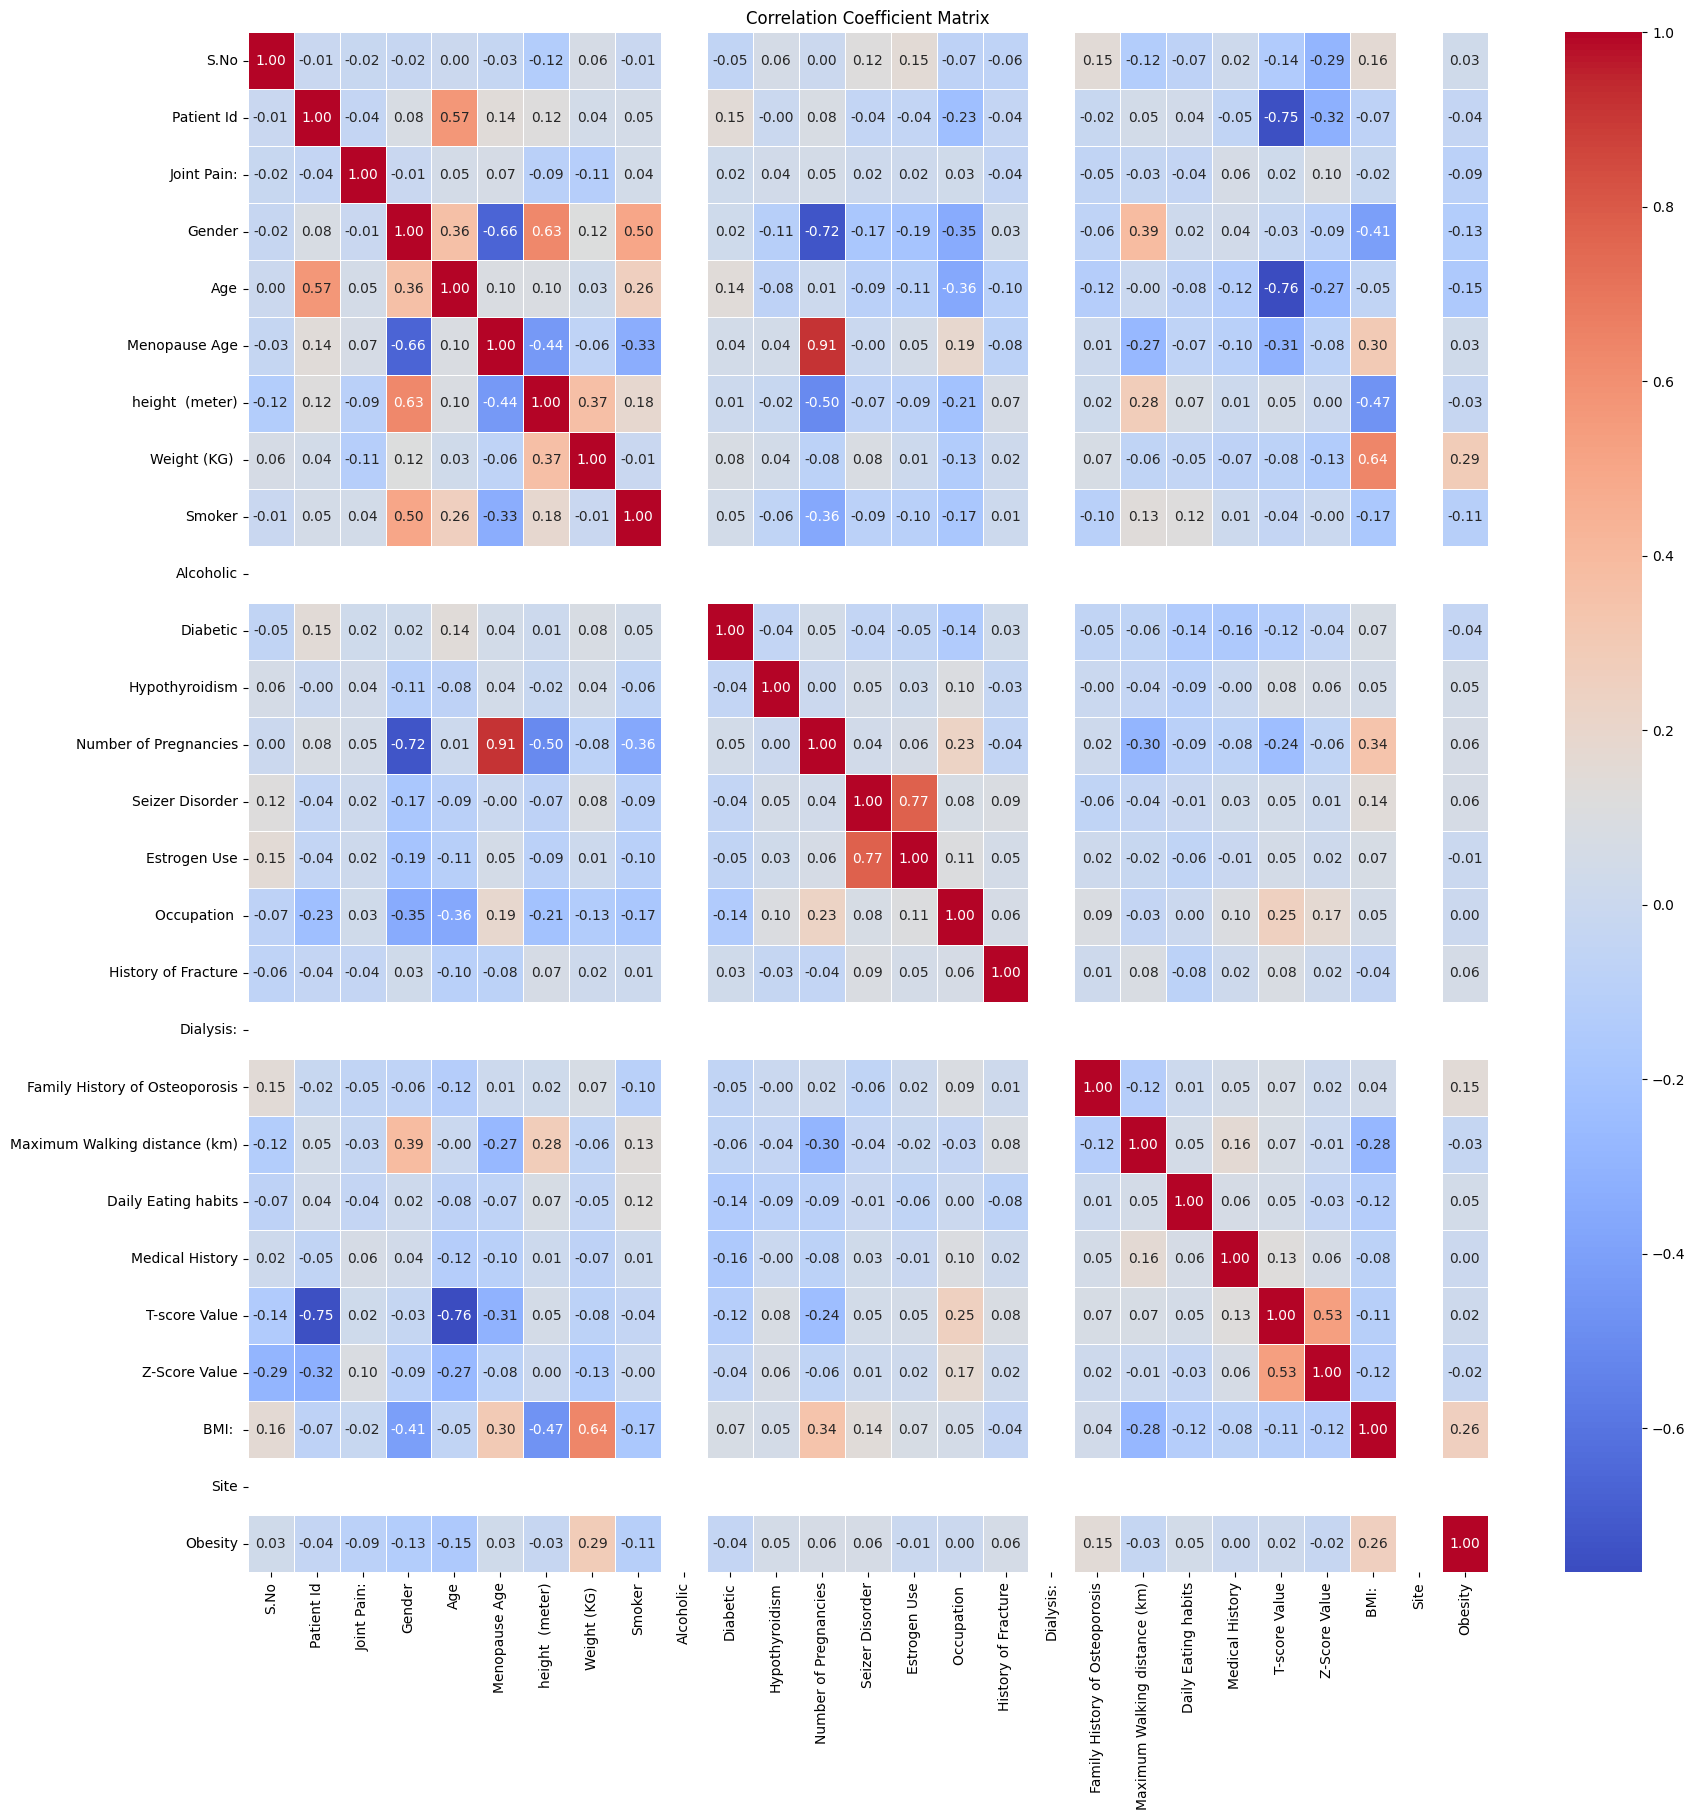

In [21]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Coefficient Matrix')
plt.show()

Highly correlated features should be dropped because they provide redundant information, which can lead to overfitting and make the model unnecessarily complex. Removing these features helps to simplify the model, improve its generalization to new data, and reduce the computational cost of training. 

As we can see in the heatmap above, the following pair of columns seem to show a high degree of correlation, and one of them may be dropped:   
'Menopause Age' and 'Number of Pregnancies'  
'T-score Value' and 'Z-Score Value'  
'Estrogen Use' and 'Seizer Disorder'  

Furthermore, the following columns can also be dropped as they are unnecessary for the model's prediction:  
'S.No'  
'Patient Id'  
'Site'



In [22]:
cleaned_df=cleaned_df.drop(columns=['S.No','Patient Id','Site','Number of Pregnancies','Z-Score Value','Estrogen Use'])

### TRAIN-TEST SPLIT

In [23]:
# Separate features and target variable again
X = cleaned_df.drop(columns=['Diagnosis'])
y = cleaned_df['Diagnosis']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [25]:
# Check for class imbalance
print(cleaned_df['Diagnosis'].value_counts())

Diagnosis
0    149
2     47
1     35
Name: count, dtype: int64


C:\Users\siddh\AppData\Local\Temp\ipykernel_7120\2059616711.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=cleaned_df['Diagnosis'], palette=custom_palette)


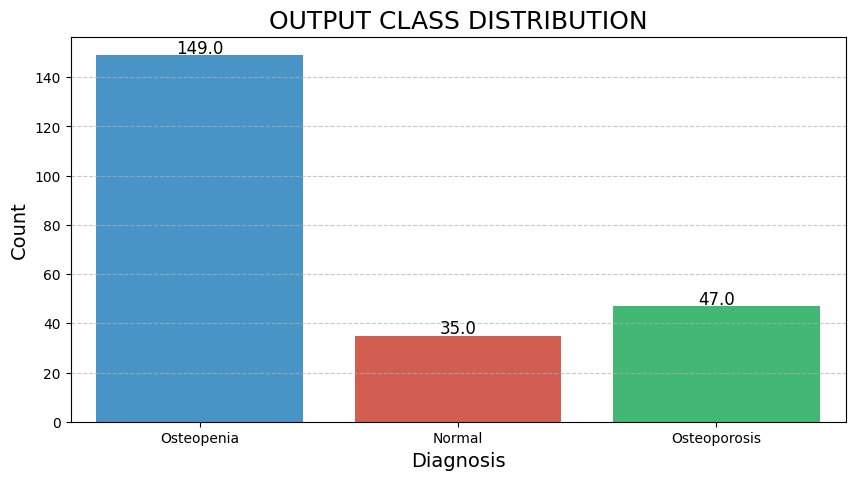

In [26]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define custom colors
custom_palette = ["#3498db", "#e74c3c", "#2ecc71"]

# Map the diagnosis numerical values back to their original labels
label_mapping = {0: 'Osteopenia', 1: 'Normal', 2: 'Osteoporosis'}
cleaned_df['Diagnosis'] = cleaned_df['Diagnosis'].map(label_mapping)

# Create the countplot with custom colors
plt.figure(figsize=(10, 5))
sb.countplot(x=cleaned_df['Diagnosis'], palette=custom_palette)

# Add title and labels
plt.title('OUTPUT CLASS DISTRIBUTION', fontsize=18)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations on each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()



As we can see there is a enormous imbalance of classes in the target variable ('Diagnosis').  
This can be handled by using SMOTE(Synthetic Minority Over-sampling Technique), a method used to balance class distribution in a dataset.  
SMOTE generates new samples by finding nearest neighbors of minority class instances and creating new instances that are combinations of these neighbors. 

In [27]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [28]:
# Check the new class distribution after applying SMOTE
print(pd.Series(y_train_res).value_counts())


Diagnosis
0    104
1    104
2    104
Name: count, dtype: int64


C:\Users\siddh\AppData\Local\Temp\ipykernel_7120\2136906920.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=y_train_res_mapped, palette=custom_palette)


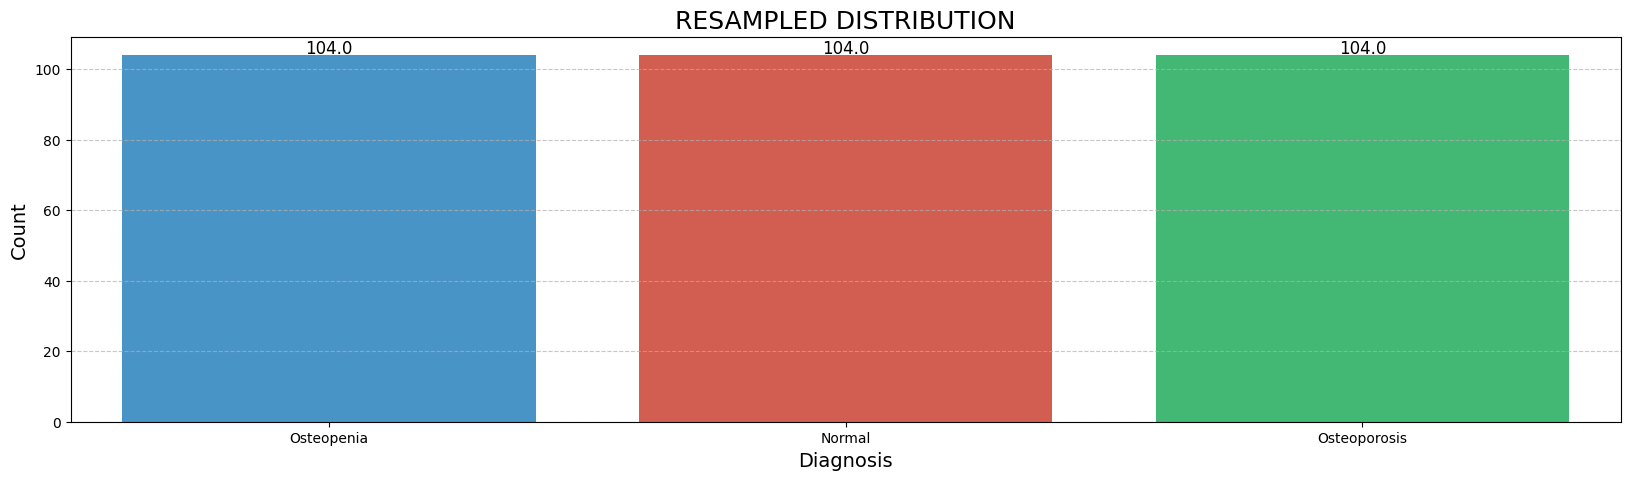

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define custom colors
custom_palette = ["#3498db", "#e74c3c", "#2ecc71"]

# Map the diagnosis numerical values back to their original labels
label_mapping = {0: 'Osteopenia', 1: 'Normal', 2: 'Osteoporosis'}
y_train_res_mapped = pd.Series(y_train_res).map(label_mapping)

# Create the countplot with custom colors
plt.figure(figsize=(20, 5))
sb.countplot(x=y_train_res_mapped, palette=custom_palette)

# Add title and labels
plt.title('RESAMPLED DISTRIBUTION', fontsize=18)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations on each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()



The classes in the target variable are now balanced.

In [30]:
cleaned_df

,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,Diabetic,Hypothyroidism,Seizer Disorder,Occupation,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,BMI:,Obesity,Diagnosis
0,1,1,65,-1.0,1.64592,65,1,0,0,0,0,24,35,0,0,0.2,5,0,-1.98,23.993627,1,Osteopenia
1,1,0,54,46.0,1.67640,78,0,0,0,0,0,16,35,0,0,1.0,5,0,-2.26,27.754876,3,Osteopenia
2,1,0,49,43.0,1.37160,59,0,0,0,1,0,16,29,0,0,1.0,4,8,-1.92,31.361517,2,Osteopenia
3,1,0,57,40.0,1.52400,72,0,0,0,1,0,27,35,0,0,2.0,3,5,-2.23,31.000062,2,Osteopenia
4,1,0,40,0.0,1.49352,54,0,0,0,0,0,16,35,0,0,2.0,5,0,-1.81,24.208711,1,Osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,0,56,0.0,1.54000,80,0,0,0,1,1,27,35,0,1,0.2,5,0,-1.97,33.732501,2,Osteopenia
236,1,1,55,-1.0,1.53000,63,0,0,0,0,0,0,35,0,0,6.0,5,0,-2.99,26.912726,3,Osteoporosis
237,1,1,49,-1.0,1.67000,88,0,0,0,0,0,27,3,0,1,0.5,5,1,-1.72,31.553659,2,Osteopenia
238,1,0,56,48.0,1.52000,68,0,0,0,0,0,16,35,0,1,0.2,0,0,-2.01,29.432133,3,Osteopenia


### CREATING THE MODEL

Why did we choose a Random Forest Classifier? These can be attributed to 4 features:
* The ability of random forests to provide feature importance scores helps in understanding which patient details contribute most to the prediction.
* Ensemble methods like random forests are less prone to overfitting. This is crucial to generalize the model well to handle unseen patient data.
* Most importantly, this is a classification problem, to which random forest models are best suited since they handle the non-linear relationships between features very well.


In [31]:
# Train the random forest model on the resampled data
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_features='sqrt',
    max_depth=10,
    min_samples_split=65,
    min_samples_leaf=60,
    #Reducing this further reduces the accuracy. Increasing this shoots up the accuracy and reduces overfitting risks, but increases computational complexity.
    bootstrap=True,
    random_state=24
)
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(max_depth=10, min_samples_leaf=60, min_samples_split=65,
                       n_estimators=1000, random_state=24)

#### Prediction Probability Plot  
This plot shows the predicted probabilities for each class, providing insights into the confidence of the model's predictions.
* X-Axis: This axis typically represents the range of predicted probabilities, from 0 to 1. Each point on this axis indicates a specific probability that the model assigns to the predicted class.
* Y-Axis: This axis usually shows the number of instances (samples) that fall into each probability bin. It can also represent the density of predictions if the graph is a density plot.  

Bars or peaks near 1 on the X-axis indicate that the model is making predictions with high confidence.  
For example, a bar at 0.9 suggests many instances are predicted with 90% confidence for a particular class.



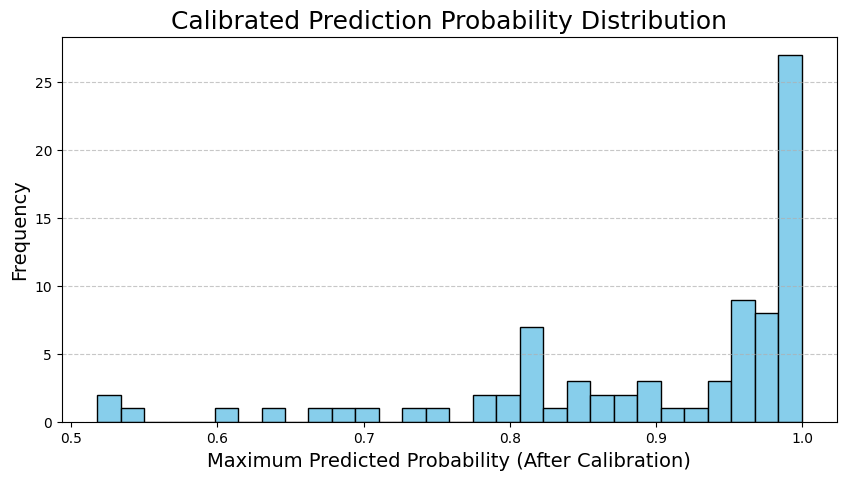

In [32]:
#Platt Scaling
# Apply calibration to the trained random forest model
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf = CalibratedClassifierCV(rf_model, method='sigmoid', cv='prefit')
calibrated_rf.fit(X_train_res, y_train_res)

# Predict probabilities for the test set using the calibrated model
y_prob_calibrated = calibrated_rf.predict_proba(X_test)

# Plot the histogram of maximum predicted probabilities after calibration
import matplotlib.pyplot as plt
import numpy as np

y_prob_calibrated_max = np.max(y_prob_calibrated, axis=1)

plt.figure(figsize=(10, 5))
plt.hist(y_prob_calibrated_max, bins=30, color='skyblue', edgecolor='black')
plt.title('Calibrated Prediction Probability Distribution', fontsize=18)
plt.xlabel('Maximum Predicted Probability (After Calibration)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### EVALUATING MODEL PERFORMANCE

* Training accuracy is the percentage of correctly predicted instances on the training dataset.  
* Test accuracy is the percentage of correctly predicted instances on the test dataset (unseen data).

In [33]:
# Calculate and print training accuracy
train_accuracy = calibrated_rf.score(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate and print test accuracy
test_accuracy = calibrated_rf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9904
Test Accuracy: 0.9383


* Precision is the ratio of true positive predictions to the total predicted positives, indicating how many of the predicted positives are actually correct.
* Recall measures the model's ability to identify all relevant instances, representing the proportion of true positives among all actual positives.
* F1 score combines precision and recall into a single metric by calculating their harmonic mean, balancing the trade-off between the two.

In [34]:
# Evaluate model performance
y_pred = calibrated_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.86      0.95      0.90        20
           2       1.00      0.94      0.97        16

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81



In [35]:
# Save the trained model to a file
model_filename = "calibrated_random_forest_model_smote1.joblib"
dump(calibrated_rf, model_filename)

['calibrated_random_forest_model_smote1.joblib']

### INSIGHTS

After training the model, features that significantly contribute the most to the model's predictions are revealed.

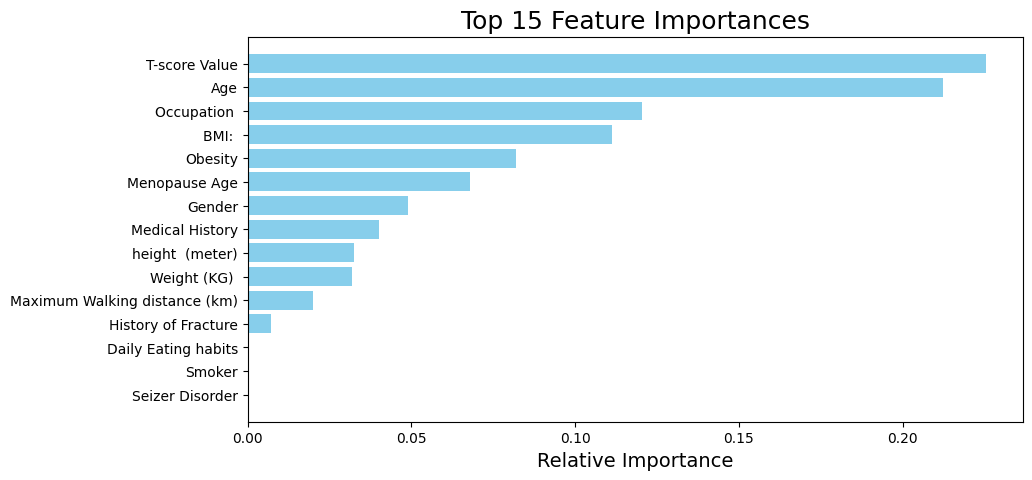

In [36]:
import numpy as np
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 5))
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 15 Feature Importances', fontsize=18)
plt.xlabel('Relative Importance', fontsize=14)
plt.show()

The ROC-AUC curve helps in evaluating the model's ability to distinguish between classes.

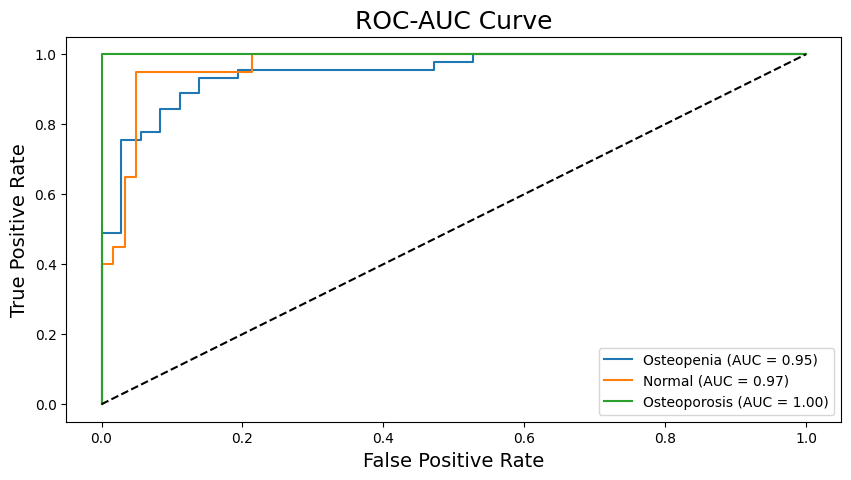

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

y_prob = rf_model.predict_proba(X_test)
plt.figure(figsize=(10, 5))

for i in range(len(label_mapping)):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f'{list(label_mapping.values())[i]} (AUC = {roc_auc_score(y_test == i, y_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-AUC Curve', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best')
plt.show()


### TESTING

In [38]:
# #Correct testing 

# from joblib import load
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Load the saved random forest model
# model = load('calibrated_random_forest_model_smote1.joblib')

# # Define the user input with all features used during training

# user_input = {
#     'Joint Pain:': 'no',
#     'Gender': 'male',
#     'Age': 22,
#     'Menopause Age': -1,
#     'height  (meter)': 1.80,
#     'Weight (KG) ': 72.0,
#     'Smoker': 'no',
#     'Alcoholic': 'no',
#     'Diabetic': 'no',
#     'Hypothyroidism': 'no',
#     'Seizer Disorder': 'no',
#     'Occupation ': 'intern',
#     'History of Fracture': 'yes',
#     'Dialysis:': 'no',
#     'Family History of Osteoporosis': 'yes',
#     'Maximum Walking distance (km)': 4,
#     'Daily Eating habits': 'balanced',
#     'Medical History': 'no',
#     'T-score Value': -1.0,  # T-score indicating osteoporosis    
#     'BMI: ': 21,
#     'Obesity': 'normal weight'
# }


# # Load the saved random forest model
# from joblib import load
# model = load('random_forest_model_smote1.joblib')

# # Convert the user input to a DataFrame
# user_df = pd.DataFrame([user_input])

# # Handle missing values
# user_df['Menopause Age'] = user_df['Menopause Age'].fillna(0)


# # Encode categorical variables
# label_encoders = {}
# for column in user_df.columns:
#     if user_df[column].dtype == object:
#         le = LabelEncoder()
#         user_df[column] = le.fit_transform(user_df[column])
#         label_encoders[column] = le

# # Convert to list of values
# sample_data = user_df.values.tolist()

# # Make predictions using the loaded model
# prediction = model.predict(user_df)

# # Output the prediction
# if(prediction[0]==0):
#     print("Osteopenia")
# elif(prediction[0]==1):
#     print("Normal")
# else:
#     print("Osteoporosis")



In [39]:
# from joblib import load
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Load the saved random forest model
# model = load('calibrated_random_forest_model_smote1.joblib')

# # Randomly select rows from the cleaned dataframe
# num_samples = 100  # Specify the number of samples you want to randomly pick
# sample_df = cleaned_df.sample(n=num_samples, random_state=1)
# diagnosis_df = sample_df['Diagnosis']
# sample_df = sample_df.drop(columns=['Diagnosis'])

# # Handle missing values
# sample_df['Menopause Age'] = sample_df['Menopause Age'].fillna(0)

# # Encode categorical variables
# label_encoders = {}
# for column in sample_df.columns:
#     if sample_df[column].dtype == object:
#         le = LabelEncoder()
#         sample_df[column] = le.fit_transform(sample_df[column])
#         label_encoders[column] = le

# # Make predictions using the loaded model
# predictions = model.predict(sample_df)

# # Convert predictions to human-readable labels
# prediction_mapping = {0: "Osteopenia", 1: "Normal", 2: "Osteoporosis"}
# predicted_labels = [prediction_mapping[prediction] for prediction in predictions]

# # Create a DataFrame with all information
# result_df = pd.DataFrame(sample_df)
# result_df['Diagnosis'] = diagnosis_df
# result_df['Predicted Diagnosis'] = predicted_labels

# # Save the DataFrame to a CSV file
# result_df.to_csv('prediction_results.csv', index=False)


In [40]:
from joblib import load
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the saved random forest model
model = load('calibrated_random_forest_model_smote1.joblib')

push_df=pd.DataFrame(X_test)

# Convert integer labels in y_test to string labels
label_mapping = {0: "Osteoporosis", 1: "Normal", 2: "Osteopenia"}
y_test_labels = [label_mapping[label] for label in y_test]
push_df['Diagnosis'] = y_test_labels


# Randomly select rows from the cleaned dataframe
num_samples = 50  # Specify the number of samples you want to randomly pick
sample_df = push_df.sample(n=num_samples, random_state=1)
diagnosis_df = sample_df['Diagnosis']
sample_df = sample_df.drop(columns=['Diagnosis'])

# Handle missing values
sample_df['Menopause Age'] = sample_df['Menopause Age'].fillna(0)

# Encode categorical variables
label_encoders = {}
for column in sample_df.columns:
    if sample_df[column].dtype == object:
        le = LabelEncoder()
        sample_df[column] = le.fit_transform(sample_df[column])
        label_encoders[column] = le

# Make predictions using the loaded model
predictions = model.predict(sample_df)

# Convert predictions to human-readable labels
prediction_mapping = {2: "Osteopenia", 1: "Normal", 0: "Osteoporosis"}
predicted_labels = [prediction_mapping[prediction] for prediction in predictions]

# Create a DataFrame with all information
result_df = pd.DataFrame(sample_df)
result_df['Diagnosis'] = diagnosis_df
result_df['Predicted Diagnosis'] = predicted_labels

# Save the DataFrame to a CSV file
result_df.to_csv('prediction_results.csv', index=False)


### VISUALIZING RESULTS

In [41]:
# Compare predictions and actual values
correct_predictions = (y_pred == y_test).astype(int)

In [42]:
# Create a DataFrame to visualize
visualization_df = pd.DataFrame({
    'Entry': range(len(y_test)),
    'Correct': correct_predictions
})

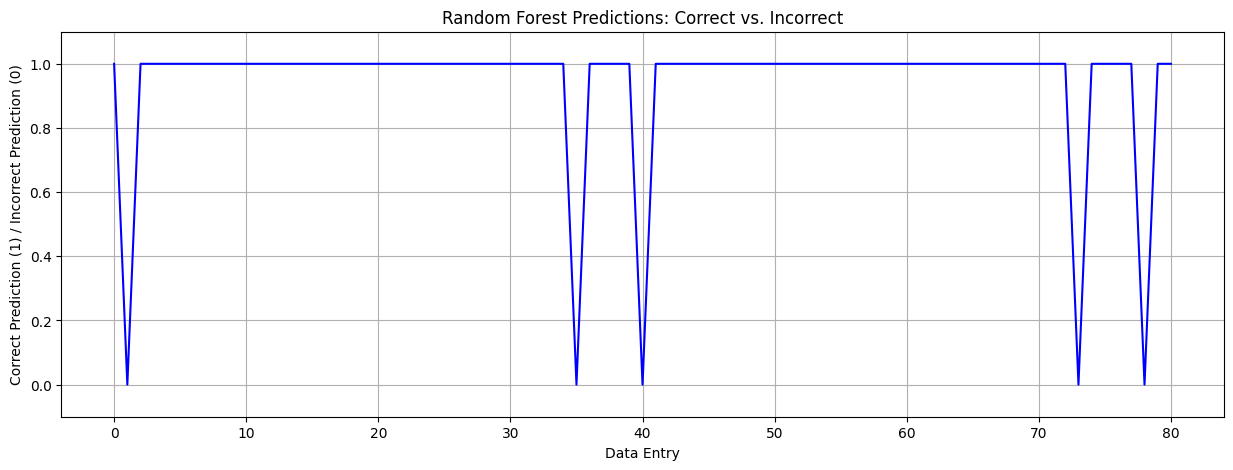

In [43]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(visualization_df['Entry'], visualization_df['Correct'], linestyle='-', color='b')
plt.ylim(-0.1, 1.1)
plt.xlabel('Data Entry')
plt.ylabel('Correct Prediction (1) / Incorrect Prediction (0)')
plt.title('Random Forest Predictions: Correct vs. Incorrect')
plt.grid(True)
plt.show()